In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [11]:
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train = train.iloc[:, 1:]
X_train.shape

(42000, 784)

In [7]:
Y_train = train.iloc[:, 0]
Y_train.shape

(42000,)

In [13]:
X_test = test.iloc[:, 0:]
X_test.shape

(28000, 784)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  #This creates an object of the DecisionTreeClassifier() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth": [14, 15, 16, 20],
    "splitter": ["best", "random"]
} #Preparing parameters for GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid= parameters, cv = 10, n_jobs=-1) #creating an object of the GridSearchCV class for parameters to be passed.
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 15, 16, 20],
                         'splitter': ['best', 'random']})

In [25]:
grid.fit(X_train, Y_train) #Passing X_train and Y_train for GridSearchCV to help find best parameters for this model.

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 15, 16, 20],
                         'splitter': ['best', 'random']})

In [18]:
grid.best_params_ #displays the best(ideal) parameters for Classifier Model for best accuracy

{'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}

In [26]:
grid.best_score_ #Displays highest possible accuracy with the best possible set of parameters

0.8713333333333333

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini", max_depth = 15, splitter = "best")  #This creates an object of the DecisionTreeClassifier() class for passing the values of X and Y for model training
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=15)

In [28]:
Y_train[100]

9

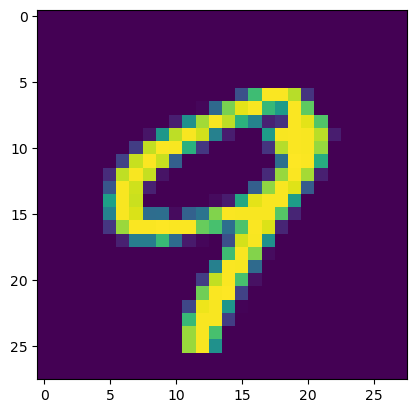

In [40]:
import matplotlib.pyplot as plt
plt.imshow(X_train.iloc[100].values.reshape(28, 28))

In [35]:
Y_train[69]

0

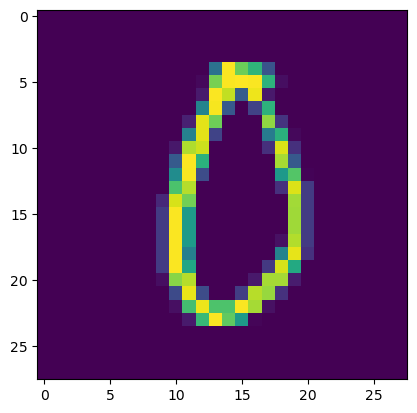

In [39]:
import matplotlib.pyplot as plt
plt.imshow(X_train.iloc[69].values.reshape(28, 28))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


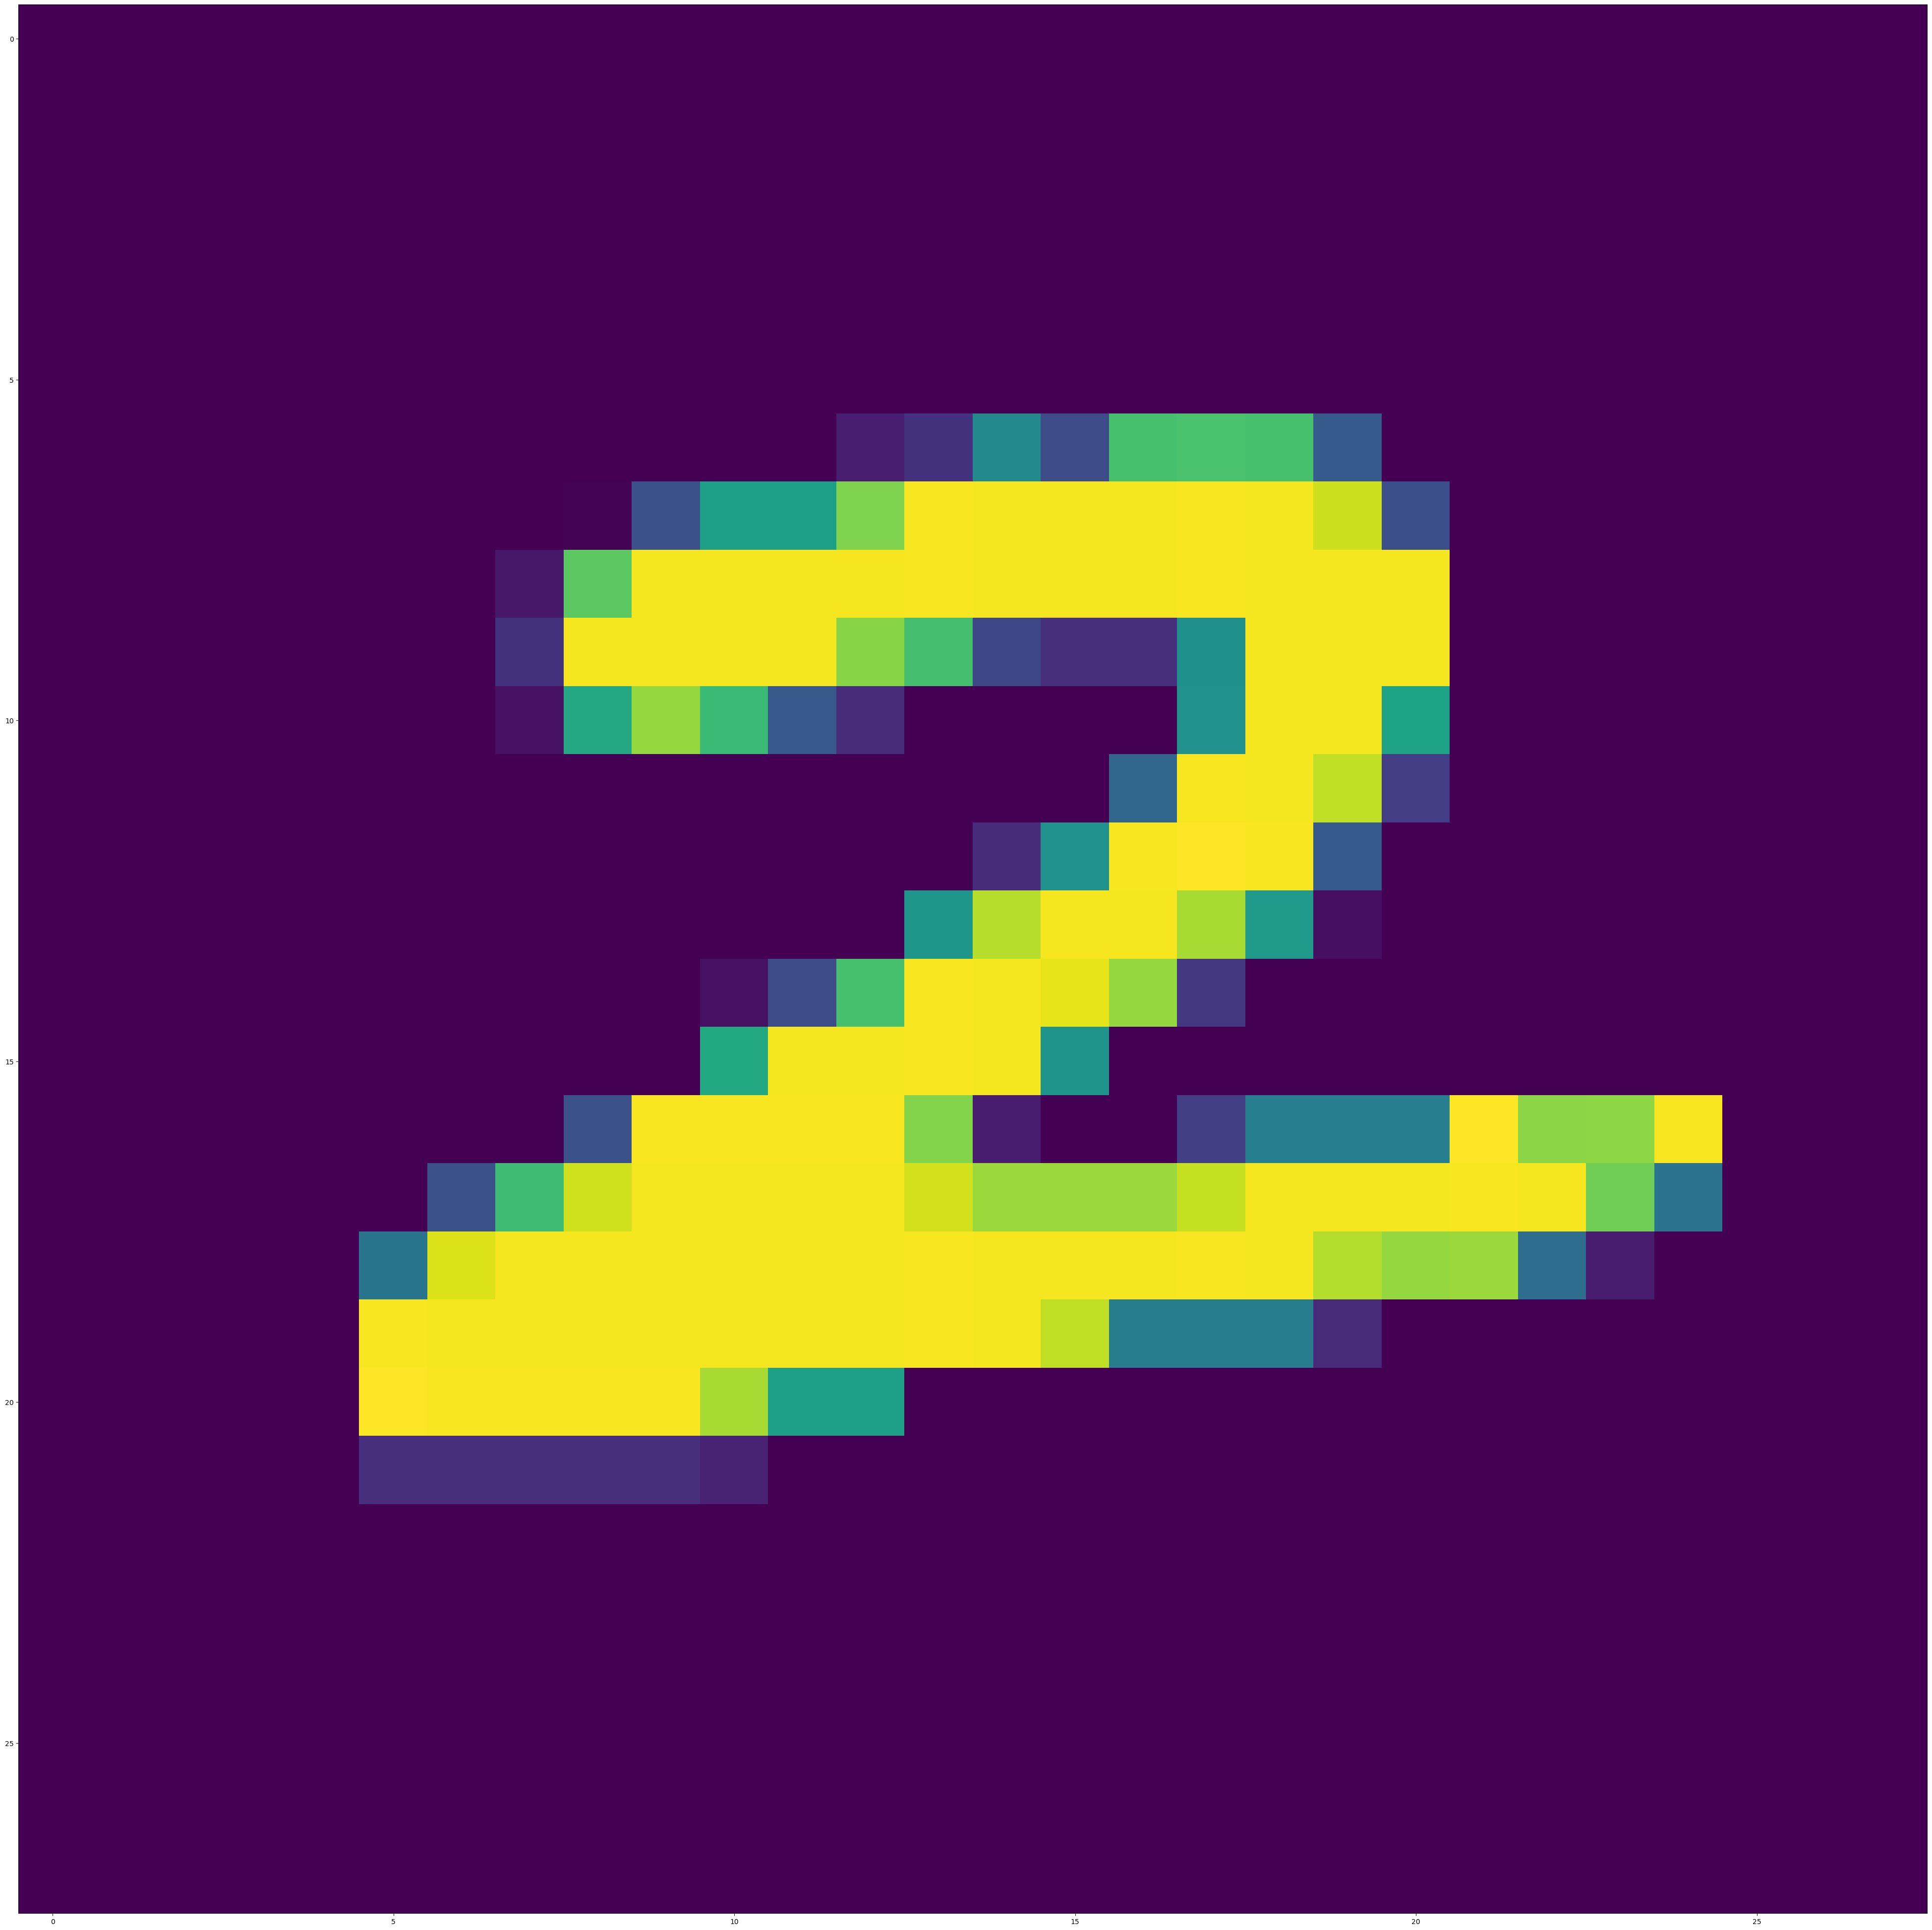

[2]


In [72]:
import random
random_row_index = random.randint(0, X_test.shape[0] - 1)
test_row = X_test.iloc[random_row_index].values

# Reshape the test row to match the input shape expected by the model
test_row = test_row.reshape(1, -1)

# Make the prediction for the selected row
prediction = model.predict(test_row)

# Display the image
plt.imshow(X_test.iloc[random_row_index].values.reshape(28, 28))
plt.show()

# Print the prediction
print(prediction)


[Text(0.4012409300791557, 0.96875, 'x[409] <= 0.5\ngini = 0.9\nsamples = 42000\nvalue = [4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063\n4188]'),
 Text(0.16121140130277045, 0.90625, 'x[434] <= 0.5\ngini = 0.816\nsamples = 13921\nvalue = [3454, 4117, 1146, 865, 222, 1636, 767, 453, 1083\n178]'),
 Text(0.08057113016710642, 0.84375, 'x[455] <= 5.5\ngini = 0.555\nsamples = 5220\nvalue = [3397, 13, 261, 307, 52, 513, 290, 275, 50, 62]'),
 Text(0.04470921284080915, 0.78125, 'x[323] <= 8.0\ngini = 0.823\nsamples = 1811\nvalue = [462, 12, 171, 276, 14, 425, 189, 209, 35, 18]'),
 Text(0.020124230430958664, 0.71875, 'x[489] <= 1.0\ngini = 0.713\nsamples = 866\nvalue = [411, 3, 83, 7, 8, 130, 118, 93, 4, 9]'),
 Text(0.010345206684256817, 0.65625, 'x[183] <= 1.5\ngini = 0.505\nsamples = 592\nvalue = [404, 1, 25, 5, 3, 26, 32, 89, 2, 5]'),
 Text(0.00474934036939314, 0.59375, 'x[570] <= 16.0\ngini = 0.597\nsamples = 145\nvalue = [33, 0, 6, 1, 2, 8, 7, 85, 2, 1]'),
 Text(0.002638522427440633, 0

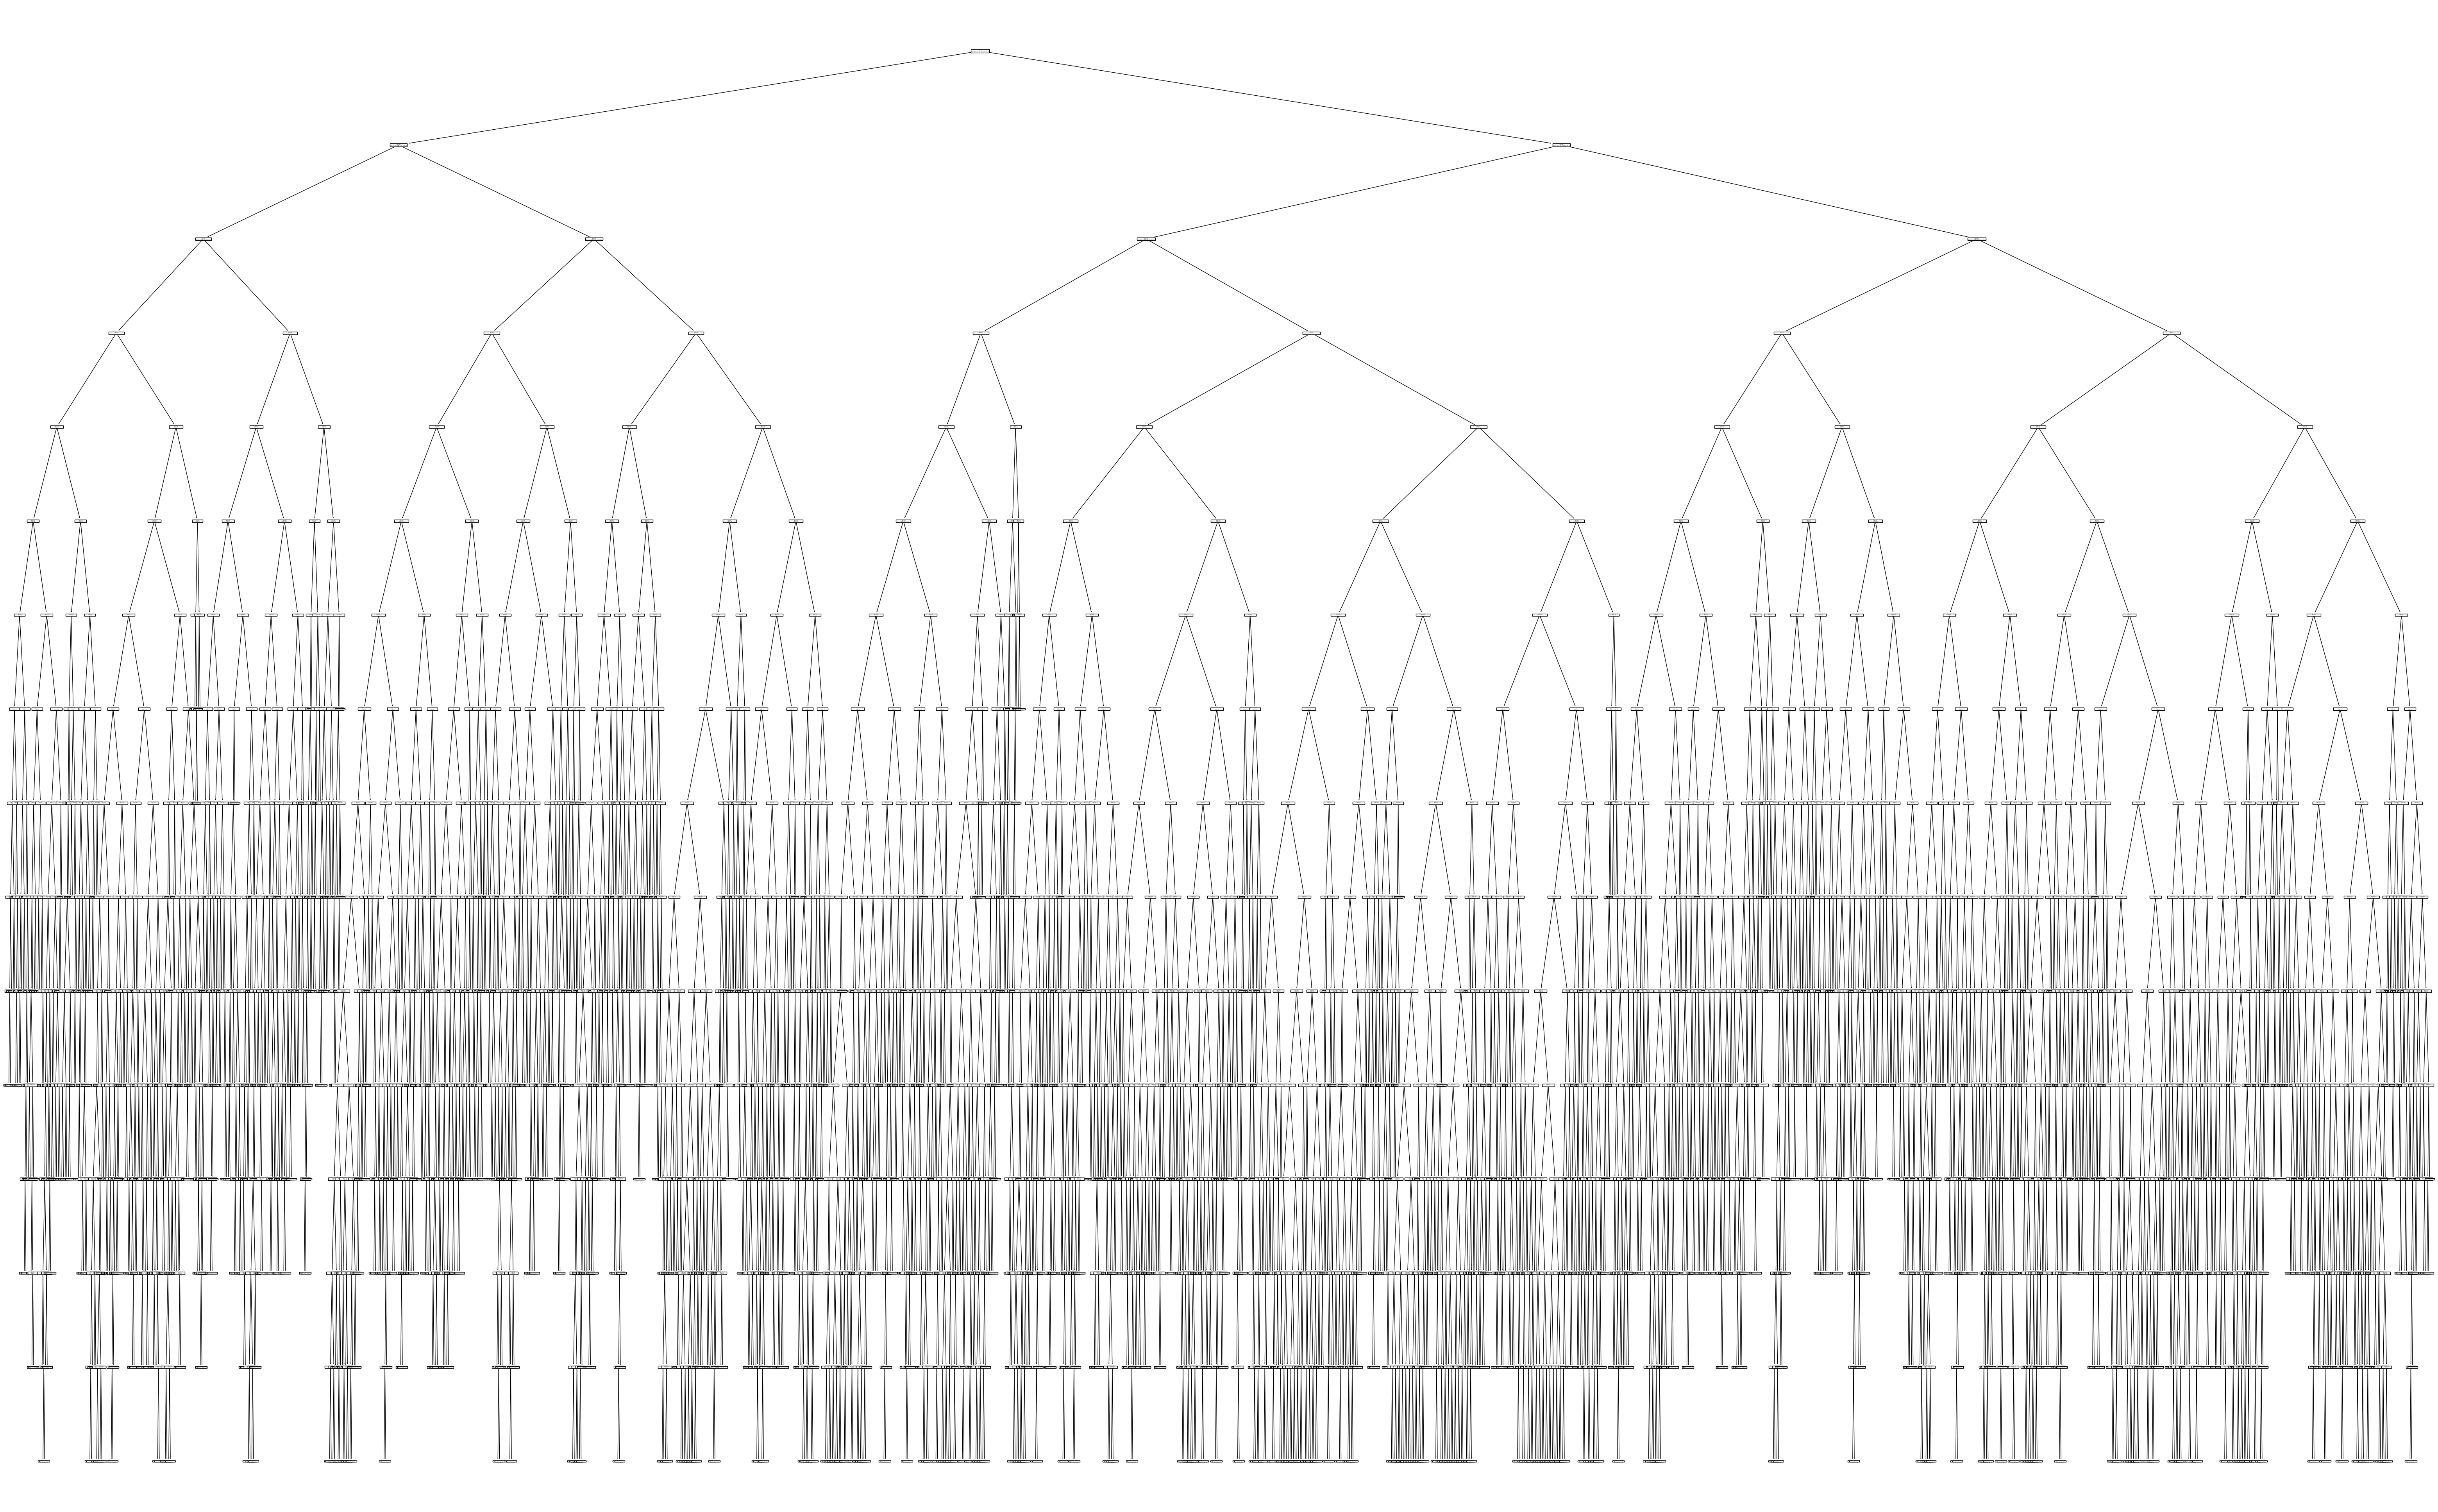

In [46]:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(model) # Finally, generate a model for the decision tree model that we generated earlier as 'model'.